## Задание

ель: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

Описание задания:

Решить задачу классификации при помощи обучения модели логистической регрессии.

 Целевая переменная — пол спортсмена.
 
  Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. 
  
  Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures


In [8]:
data_sport = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Регуляризация/ноутбук_и_дополнительнае_материалы-_Оценка_точности_модели__переобучение__регуляризация/athletes.csv')

data_sport.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [9]:
data_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Работа с пропусками - заменим пропуски в данных медианой по группе и оставшиеся пропуски, которые не будут заменены медианой по группе - общей медианой

In [32]:
data_sport['height'] = data_sport['height'].fillna(data_sport.groupby(['sport','sex'])['height'].transform('median'))
data_sport['weight'] = data_sport['weight'].fillna(data_sport.groupby(['sport','sex'])['weight'].transform('median'))

In [33]:
data_sport['weight'] = data_sport['weight'].fillna(data_sport['weight'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [36]:
data_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Подготовка данных к обучению

In [37]:
data_sport['sport'].unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

Закодируем признак "спорт" и "пол" сначала с помощью label encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [48]:
label.fit(data_sport['sport'])


In [40]:
label.classes_

array(['aquatics', 'archery', 'athletics', 'badminton', 'basketball',
       'boxing', 'canoe', 'cycling', 'equestrian', 'fencing', 'football',
       'golf', 'gymnastics', 'handball', 'hockey', 'judo',
       'modern pentathlon', 'rowing', 'rugby sevens', 'sailing',
       'shooting', 'table tennis', 'taekwondo', 'tennis', 'triathlon',
       'volleyball', 'weightlifting', 'wrestling'], dtype=object)

In [51]:
data_sport['classes'] = label.transform(data_sport['sport'])

In [57]:
label2 = label.fit(['female','male'])

In [60]:
data_sport['classes_sex'] = label2.transform(data_sport['sex'])

In [61]:
Y = data_sport['classes_sex']
X = data_sport[['height','weight','classes']]

In [62]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
11533    0
11534    0
11535    1
11536    1
11537    1
Name: classes_sex, Length: 11538, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [71]:
y_test.shape

(2308,)

Обучение

In [74]:
model = LogisticRegression()

In [75]:
model.fit(X_train,y_train)

LogisticRegression()

In [77]:
prediction = model.predict_proba(X_test)
prediction

array([[0.29774697, 0.70225303],
       [0.31991344, 0.68008656],
       [0.07969277, 0.92030723],
       ...,
       [0.51795266, 0.48204734],
       [0.83258378, 0.16741622],
       [0.05803188, 0.94196812]])

In [117]:
pred = model.predict(X_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

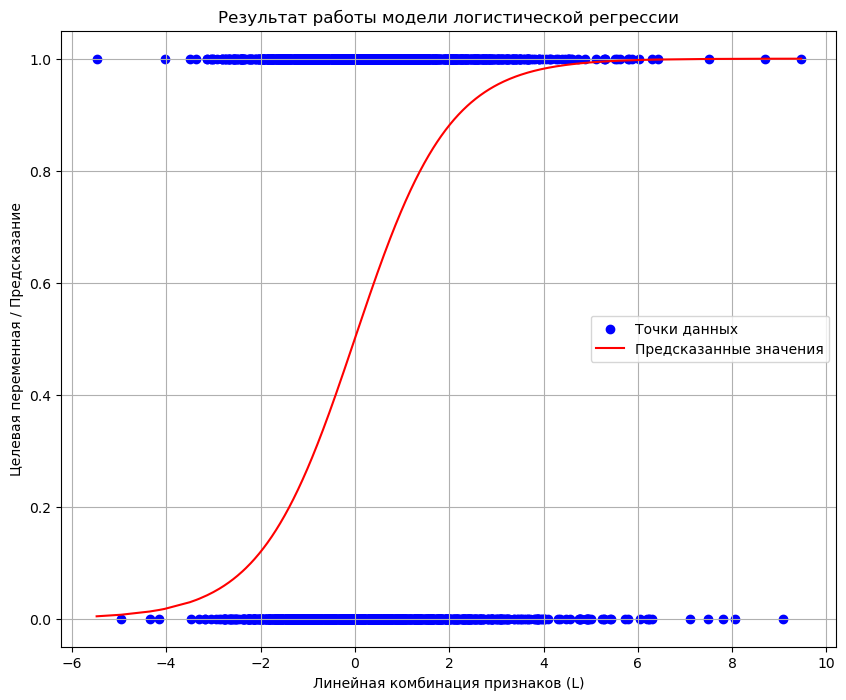

In [96]:

# Вычисляем линейную комбинацию L и предсказания сигмоиды для последних установленных параметров - конечный результат обучения
L = model.decision_function(X_test)       # Линейная комбинация признаков
pred = model.predict_proba(X_test)[:, 1]

# Сортируем по L для гладкой линии

sorted_idx = np.argsort(L)
L_sorted = L[sorted_idx]
pred_sorted = pred[sorted_idx]
Y_sorted = Y.to_numpy()[sorted_idx]

# Рисуем график
plt.figure(figsize=(10, 8))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

Построение ROC-кривой

In [182]:
from sklearn.metrics import roc_curve
fpr_1, tpr_1, thres = roc_curve(y_test, prediction[:, 1])

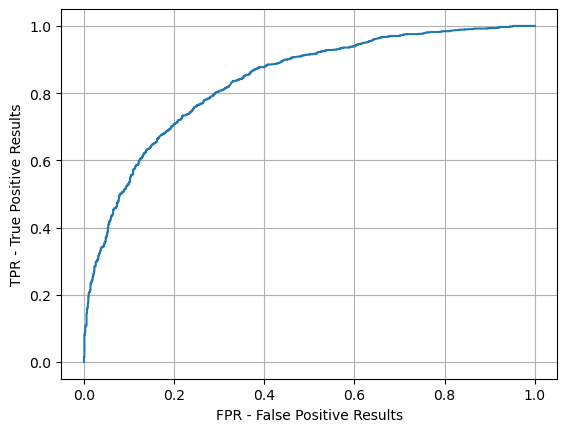

In [183]:
plt.plot(fpr_1, tpr_1)
plt.xlabel('FPR - False Positive Results')
plt.ylabel('TPR - True Positive Results')
plt.grid()

Подсчет площади под графиком

In [184]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction[:, 1])

0.8359479737516758

Площадь под кривой достаточно высокая

Расчет основных метрик

In [101]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

for predicted_prob, actual in zip(prediction[:, 1], y_test): ## объединяем вероятность предсказания первого класса и метки в один массив
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1: # и если реальная метка = 1
            tp += 1 ## то тру позитив
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1 # если предсказание = 0, а реальная метка = 1, то это ложная цель - плохая ошибка
        else:
            tn += 1

In [102]:
tp,fp,fn,tn

(962, 254, 309, 783)

In [112]:
from sklearn.metrics import recall_score, precision_score

In [122]:
## accuracy
accuracy = (tp + tn) / (tp + tn + fn+ fp)

accuracy_1 = model.score(X_test,y_test)

print(f"Вычисленное самостоятельно - {accuracy}, вычисленное с помощью библиотеки sklearn {accuracy_1}")

Вычисленное самостоятельно - 0.7560658578856152, вычисленное с помощью библиотеки sklearn 0.7560658578856152


In [123]:
# presicion
presicion = tp / (tp + fp)

presicion_1 = precision_score(y_test,pred)
print(f"Вычисленное самостоятельно - {presicion}, вычисленное с помощью библиотеки sklearn {presicion_1}")

Вычисленное самостоятельно - 0.7911184210526315, вычисленное с помощью библиотеки sklearn 0.7911184210526315


In [132]:
# recall - доля найденных классов male

recall = tp / (tp + fn)
recall_1 = recall_score(y_test,pred)
print(f"Вычисленное самостоятельно - {recall}, вычисленное с помощью библиотеки sklearn {recall_1}")

Вычисленное самостоятельно - 0.7568843430369787, вычисленное с помощью библиотеки sklearn 0.7568843430369787


In [129]:
## доля классифицируемых (найденных) нулевых классов (female)
fpr = fp / (fp + tn)
fpr

0.24493731918997108

Все метрики имеют достаточно высокие показатели, следовательно, можно сделать вывод, что модель достаточно хорошо справляется с поставленной задаче классификации

Построение ROC-кривой с помощью вычисленных метрик

In [179]:
fpr_list = []
tpr_list = []
threshers = np.linspace(1, 0, 100)
probs = model.predict_proba(X_test)[:, 1]


In [180]:
for thresh in threshers:
    preds = (probs >= thresh).astype(int)

    tp = np.sum((y_test == 1) & (preds == 1))
    fp = np.sum((y_test == 0) & (preds == 1))
    fn = np.sum((y_test == 1) & (preds == 0))
    tn = np.sum((y_test == 0) & (preds == 0))

    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

    fpr_list.append(fpr)
    tpr_list.append(tpr)


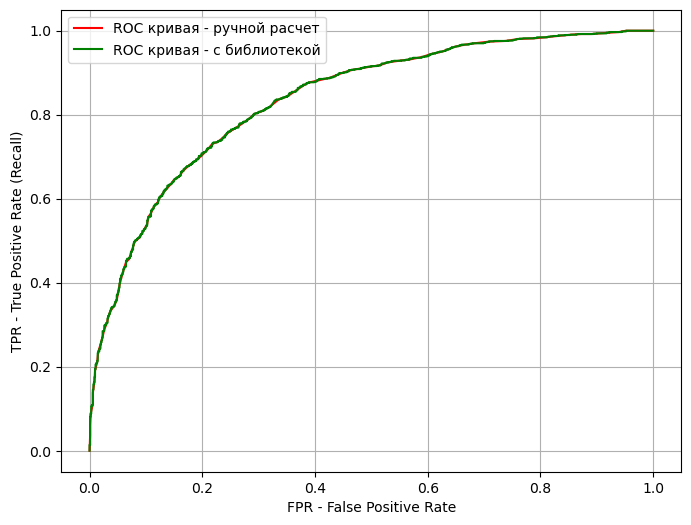

In [187]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='red', label='ROC кривая - ручной расчет')
plt.plot(fpr_1,tpr_1, color = 'green', label='ROC кривая - с библиотекой')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate (Recall)')

plt.legend()
plt.grid(True)
plt.show()

Графики совпадают, следовательно, их площади тоже

Построение графика Presicion - Recall

In [200]:
precision_list = []
recall_list = []
threshers = np.linspace(0, 1, 100)
probs = model.predict_proba(X_test)[:, 1]

for thresh in threshers:
    preds = (probs >= thresh).astype(int)

    tp = np.sum((y_test == 1) & (preds == 1))
    fp = np.sum((y_test == 0) & (preds == 1))
    fn = np.sum((y_test == 1) & (preds == 0))
    tn = np.sum((y_test == 0) & (preds == 0))

    rec = tp / (tp + fn) if (tp + fn) != 0 else 0
    prc = tp / (tp + fp) if (tp + fp) != 0 else 0

    precision_list.append(prc)
    recall_list.append(rec)


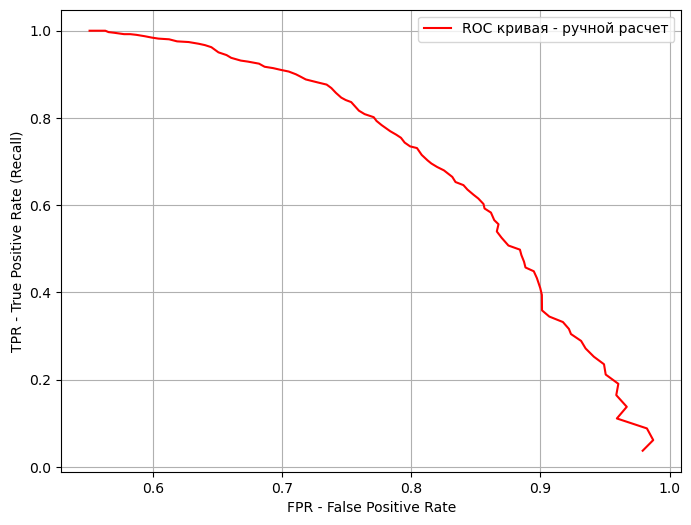

In [201]:
plt.figure(figsize=(8, 6))
plt.plot(precision_list[:-1], recall_list[:-1], color='red', label='ROC кривая - ручной расчет')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate (Recall)')

plt.legend()
plt.grid(True)
plt.show()

In [212]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thres = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)
pr_auc

0.8579237282781096

Вывод: посчитанные метрики и кривые демонстрирует хорошую работу модели по классификации спорстменов по признаку "пол". 
Метрики получились равны: accuracy - 75%, precision - 79%, recall - 76 %.  Площадь под кривой ROC - 0,84, что можно трактовать как эффективную работу классификатора. Площадь под кривой precision-recall - 0,85, что так же говорит о высокой эффективности модели. 